<a href="https://colab.research.google.com/github/AZZIELM/Deteccion_fraude/blob/main/Deteccion_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detección de fraude

In [1]:
!git clone https://github.com/AZZIELM/Deteccion_fraude

Cloning into 'Deteccion_fraude'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 7.35 MiB | 7.77 MiB/s, done.


In [ ]:
import pandas as pd
import numpy as np
from scipy import special

import itertools
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
fraude_df= pd.read_csv("/content/Deteccion_fraude/Fraud_Data.csv")

In [ ]:
ip_df=pd.read_csv('/content/Deteccion_fraude/IpAddress_to_Country.csv')

In [ ]:
fraude_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
ip_df.head()

,limite_inferior_ip,limite_superior_ip,pais
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              151112 non-null  int64  
 1   hora_registro   151112 non-null  object 
 2   hora_compra     151112 non-null  object 
 3   valor_compra    151112 non-null  int64  
 4   id_dispositivo  151112 non-null  object 
 5   fuente          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   genero          151112 non-null  object 
 8   edad            151112 non-null  int64  
 9   ip              151112 non-null  float64
 10  fraude          151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [ ]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   limite_inferior_ip  138846 non-null  float64
 1   limite_superior_ip  138846 non-null  int64  
 2   pais                138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [ ]:
ip_df.limite_inferior_ip=ip_df.limite_inferior_ip.astype(float)

In [ ]:
ip_floats = ip_df.limite_inferior_ip.apply(lambda x: not x.is_integer()).sum()

In [ ]:
print("Casos de IPs con número decimal diferente de 0:", ip_floats)

Casos de IPs con número decimal diferente de 0: 0


In [ ]:
ip_df.limite_inferior_ip=ip_df.limite_inferior_ip.astype(int)

In [ ]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   limite_inferior_ip  138846 non-null  int64 
 1   limite_superior_ip  138846 non-null  int64 
 2   pais                138846 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


In [ ]:
fraude_df.hora_registro = pd.to_datetime(fraude_df.hora_registro)

In [ ]:
fraude_df.hora_compra = pd.to_datetime(fraude_df.hora_compra)

In [ ]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   hora_registro   151112 non-null  datetime64[ns]
 2   hora_compra     151112 non-null  datetime64[ns]
 3   valor_compra    151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fuente          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   edad            151112 non-null  int64         
 9   ip              151112 non-null  float64       
 10  fraude          151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [ ]:
fraude_df.describe()

,id,hora_registro,hora_compra,valor_compra,edad,ip,fraude
count,151112.000000,151112,151112,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,33.140704,2.152145e+09,0.093646
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,76.000000,4.294850e+09,1.000000
std,115369.285024,NaN,NaN,18.322762,8.617733,1.248497e+09,0.291336


In [ ]:
ip_df.describe()

,limite_inferior_ip,limite_superior_ip
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [ ]:
fraude_df.ip = fraude_df.ip.astype(int)

In [ ]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   hora_registro   151112 non-null  datetime64[ns]
 2   hora_compra     151112 non-null  datetime64[ns]
 3   valor_compra    151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fuente          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   edad            151112 non-null  int64         
 9   ip              151112 non-null  int64         
 10  fraude          151112 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.7+ MB


In [ ]:
def ip_por_pais(ip):
    try:
        return ip_df.pais[(ip_df.limite_inferior_ip < ip) & (ip_df.limite_superior_ip > ip)].iloc[0]
    except IndexError:
      return "Desconocido"

In [ ]:
fraude_df['ip_pais'] = fraude_df.ip.apply(ip_por_pais)

In [ ]:
fraude_df.head(30)

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2809315199,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3987484328,0,Desconocido
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1692458727,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3719094257,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,341674739,0,United States


In [ ]:
fraude_df.to_csv('Datos_fraude_con_pais.csv', index=False)

In [ ]:
base_df = pd.read_csv('Datos_fraude_con_pais.csv')

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


Aula 2 - Análisis exploratorio

In [ ]:
print('porcentaje de casos de fraude: ', int(base_df['fraude'].mean()*1000)/10, "%")

porcentaje de casos de fraude:  9.3 %


In [ ]:
base_df['fraude'].value_counts()


fraude
0    136961
1     14151
Name: count, dtype: int64

In [ ]:
base_df['browser'].value_counts()

browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64

In [ ]:
base_df.fraude = base_df.fraude.astype(int)
base_df.browser = base_df.browser.astype(object)

In [ ]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              151112 non-null  int64 
 1   hora_registro   151112 non-null  object
 2   hora_compra     151112 non-null  object
 3   valor_compra    151112 non-null  int64 
 4   id_dispositivo  151112 non-null  object
 5   fuente          151112 non-null  object
 6   browser         151112 non-null  object
 7   genero          151112 non-null  object
 8   edad            151112 non-null  int64 
 9   ip              151112 non-null  int64 
 10  fraude          151112 non-null  int64 
 11  ip_pais         151112 non-null  object
dtypes: int64(5), object(7)
memory usage: 13.8+ MB


In [ ]:
brw = base_df.groupby(by = 'browser').mean(numeric_only=True)['fraude']
brw

browser
Chrome     0.098792
FireFox    0.095165
IE         0.086775
Opera      0.089227
Safari     0.090201
Name: fraude, dtype: float64

<Axes: xlabel='fraude', ylabel='fraude'>

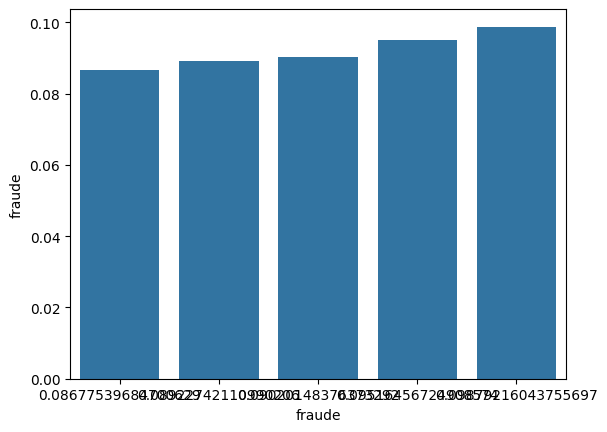

In [ ]:
sns.barplot(x = base_df.groupby(by = 'browser').mean(numeric_only=True)['fraude']
            ,y=base_df.groupby(by='browser').mean(numeric_only=True)['fraude']
            ,data=base_df)

<Axes: xlabel='fraude', ylabel='fraude'>

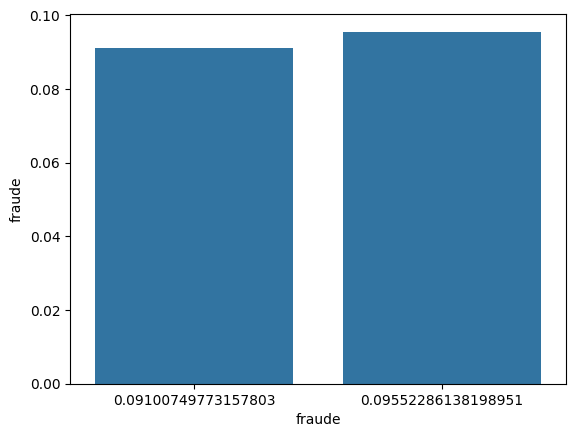

In [ ]:
sns.barplot(x=base_df.groupby(by='genero').mean(numeric_only=True)['fraude'],
            y=base_df.groupby(by='genero').mean(numeric_only=True)['fraude'],
            data=base_df)

<Axes: xlabel='fraude', ylabel='fraude'>

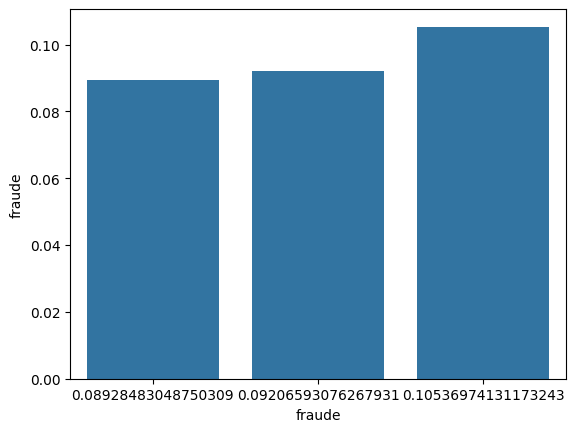

In [ ]:
sns.barplot(x=base_df.groupby(by='fuente').mean(numeric_only=True)['fraude'],
            y=base_df.groupby(by='fuente').mean(numeric_only=True)['fraude'],
            data=base_df)

<Axes: xlabel='fraude', ylabel='edad'>

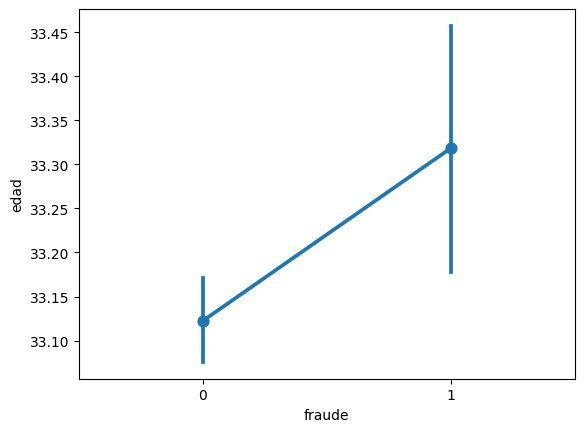

In [ ]:
sns.pointplot(x='fraude',y='edad', data=base_df)

<Axes: xlabel='fraude', ylabel='valor_compra'>

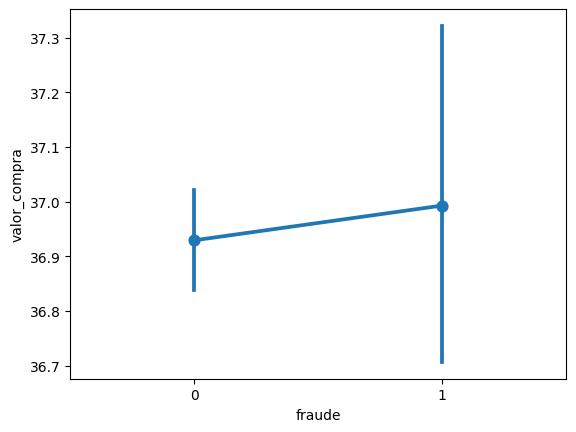

In [ ]:
sns.pointplot(x='fraude',y='valor_compra', data=base_df)

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


### Analisis ID dispositivo

In [ ]:
freq_df = pd.DataFrame(columns = ('fraude', 'id_por_dispositivio', 'id_por_ip'))

In [ ]:
freq_df['fraude'] = base_df['fraude']

In [ ]:
contar_id_dispositivo = base_df.groupby(by='id_dispositivo').id.count()

In [ ]:
freq_df['id_por_dispositivio']= base_df.id_dispositivo.apply(lambda x: contar_id_dispositivo[x])

In [ ]:
contar_id_ip = base_df.groupby(by='ip').id.count()

In [ ]:
freq_df['id_por_ip']= base_df.ip.apply(lambda x: contar_id_ip[x])

In [ ]:
freq_df.head()

,fraude,id_por_dispositivio,id_por_ip
0,0,1,1
1,0,1,1
2,1,12,12
3,0,1,1
4,0,1,1


<Axes: xlabel='fraude', ylabel='id_por_dispositivio'>

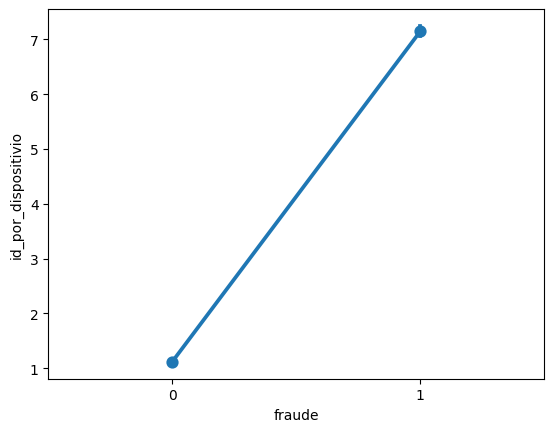

In [ ]:
sns.pointplot(x='fraude', y='id_por_dispositivio', data=freq_df)

<Axes: xlabel='fraude', ylabel='id_por_ip'>

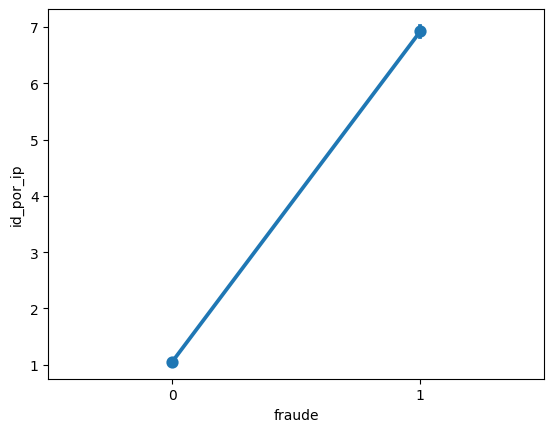

In [ ]:
sns.pointplot(x='fraude', y='id_por_ip', data=freq_df)

### Análisis IP País

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


In [ ]:
base_df.ip_pais.value_counts()

ip_pais
United States     58044
Desconocido       21975
China             12038
Japan              7306
United Kingdom     4490
                  ...  
Myanmar               1
Vanuatu               1
Dominica              1
Niger                 1
Guadeloupe            1
Name: count, Length: 182, dtype: int64

<Axes: xlabel='ip_pais'>

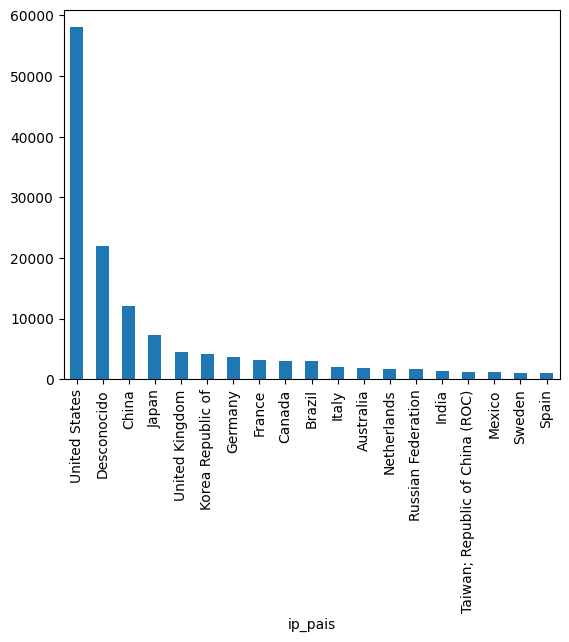

In [ ]:
base_df.ip_pais.value_counts()[base_df.ip_pais.value_counts() > 1000].plot(kind='bar')

<Axes: xlabel='ip_pais'>

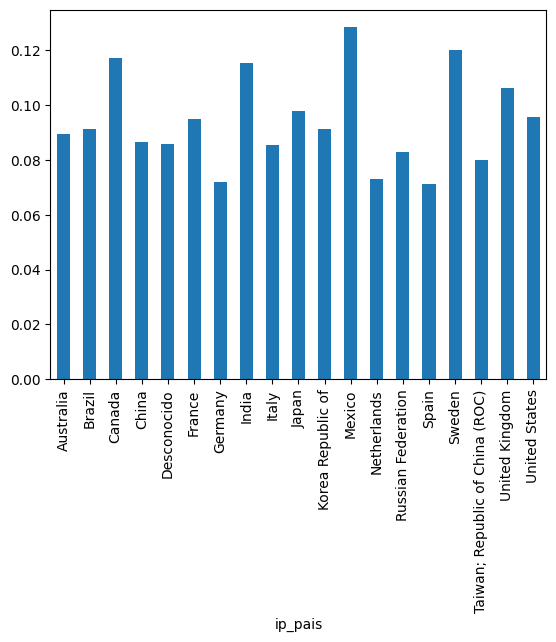

In [ ]:
base_df.groupby(by='ip_pais').mean(numeric_only=True)['fraude'][base_df.ip_pais.value_counts() > 1000].plot(kind='bar')

### Análisis hora

In [ ]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              151112 non-null  int64 
 1   hora_registro   151112 non-null  object
 2   hora_compra     151112 non-null  object
 3   valor_compra    151112 non-null  int64 
 4   id_dispositivo  151112 non-null  object
 5   fuente          151112 non-null  object
 6   browser         151112 non-null  object
 7   genero          151112 non-null  object
 8   edad            151112 non-null  int64 
 9   ip              151112 non-null  int64 
 10  fraude          151112 non-null  int64 
 11  ip_pais         151112 non-null  object
dtypes: int64(5), object(7)
memory usage: 13.8+ MB


In [ ]:
base_df['hora_registro'] = pd.to_datetime(base_df['hora_registro'])

In [ ]:
base_df['hora_compra'] = pd.to_datetime(base_df['hora_compra'])

In [ ]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   hora_registro   151112 non-null  datetime64[ns]
 2   hora_compra     151112 non-null  datetime64[ns]
 3   valor_compra    151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fuente          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   edad            151112 non-null  int64         
 9   ip              151112 non-null  int64         
 10  fraude          151112 non-null  int64         
 11  ip_pais         151112 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 13.8+ MB


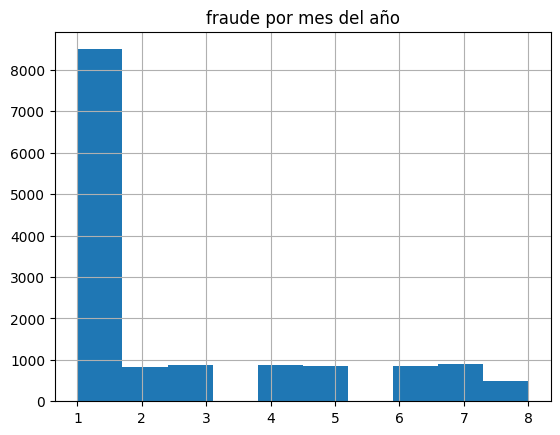

In [ ]:
base_df[base_df['fraude']==1].hora_registro.apply(lambda x: x.month).hist()
plt.title('fraude por mes del año');

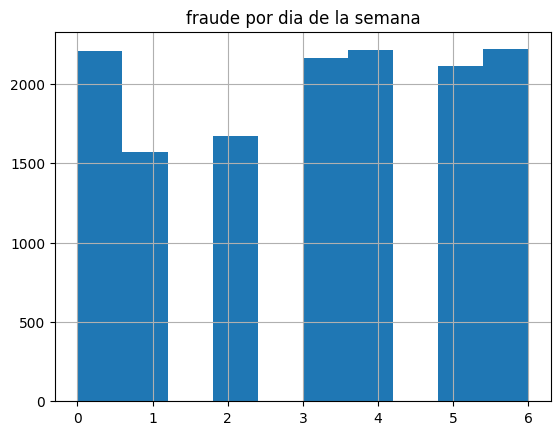

In [ ]:
base_df[base_df['fraude']==1].hora_registro.apply(lambda x: x.dayofweek).hist()
plt.title('fraude por dia de la semana');

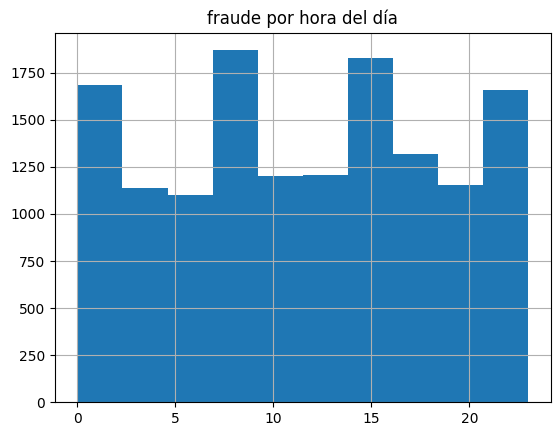

In [ ]:
base_df[base_df['fraude']==1].hora_registro.apply(lambda x: x.hour).hist()
plt.title('fraude por hora del día');

In [ ]:
freq_df['hora_registro'] = base_df['hora_registro']
freq_df['hora_compra'] = base_df['hora_compra']

In [ ]:
freq_df['tiempo_seg'] = (freq_df['hora_compra']- freq_df['hora_registro']).apply(lambda x: x.seconds)

<Axes: xlabel='fraude', ylabel='tiempo_seg'>

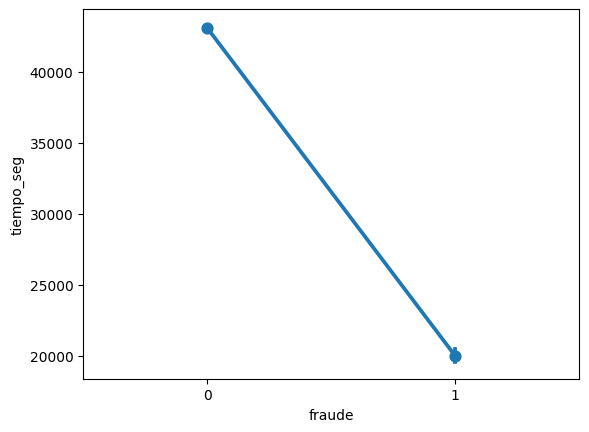

In [ ]:
sns.pointplot(x='fraude', y='tiempo_seg', data=freq_df)

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


In [ ]:
contar_id_dispositivo = base_df.groupby(by='id_dispositivo').id.count()

In [ ]:
base_df['id_por_dispositivo'] = base_df.id_dispositivo.apply(lambda x: contar_id_dispositivo[x])

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais,id_por_dispositivo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1


In [ ]:
contar_id_ip = base_df.groupby(by='ip').id.count()

In [ ]:
base_df['id_por_ip'] = base_df.ip.apply(lambda x: contar_id_ip[x])

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais,id_por_dispositivo,id_por_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,1


In [ ]:
base_df['ids']=(base_df['id_por_dispositivo']+ base_df['id_por_ip'])/2

In [ ]:
base_df['hora']=base_df.hora_registro.apply(lambda x: x.hour)
base_df['dia']=base_df.hora_registro.apply(lambda x: x.dayofweek)

In [ ]:
base_df['tiempo_seg'] = (base_df['hora_compra']- base_df['hora_registro']). apply(lambda x: x.seconds)

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1,1.0,22,1,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,1,1.0,20,6,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido,1,1,1.0,21,1,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,1,1.0,7,1,41461


In [ ]:
base_df['compra_rapida']= base_df['tiempo_seg'].apply(lambda x: 1 if x < 30 else 0)

In [ ]:
contar_paises = base_df.groupby(by = ['id_dispositivo', 'ip_pais']).count().reset_index()

In [ ]:
contar_paises = pd.DataFrame(contar_paises.groupby(by = 'id_dispositivo').count().ip_pais)

In [ ]:
contar_paises[contar_paises['ip_pais']>1]

,ip_pais
id_dispositivo,
AAFBODGQYEMVK,2
AAIGAICKBXPSW,2
AAXWKVBISBGWI,2
ABAWKCLFOLYDQ,2
ABGAAIZLGEAPV,2
...,...
ZZJGHWLIVVIIS,2
ZZJTXSOBVKLIT,2
ZZKXASRAZPHYR,2


In [ ]:
base_df= base_df.merge(contar_paises, left_on='id_dispositivo', right_index= True)

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais_x,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg,compra_rapida,ip_pais_y
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1,1.0,22,1,13882,0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,1,1.0,20,6,17944,0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1,1,1
2626,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1,1,1
22106,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1,1,1


In [ ]:
base_df.rename(columns={'ip_pais_x': 'ip_pais', 'ip_pais_y':'qt_paises'}, inplace=True)

In [ ]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151112 entries, 0 to 151111
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  151112 non-null  int64         
 1   hora_registro       151112 non-null  datetime64[ns]
 2   hora_compra         151112 non-null  datetime64[ns]
 3   valor_compra        151112 non-null  int64         
 4   id_dispositivo      151112 non-null  object        
 5   fuente              151112 non-null  object        
 6   browser             151112 non-null  object        
 7   genero              151112 non-null  object        
 8   edad                151112 non-null  int64         
 9   ip                  151112 non-null  int64         
 10  fraude              151112 non-null  int64         
 11  ip_pais             151112 non-null  object        
 12  id_por_dispositivo  151112 non-null  int64         
 13  id_por_ip           151112 non-nul

In [ ]:
riesgo_pais= pd.DataFrame(base_df.groupby(by='ip_pais').mean(numeric_only=True)['fraude'].sort_values(ascending=False))

In [ ]:
riesgo_pais.head(20)

,fraude
ip_pais,
Turkmenistan,1.000000
Namibia,0.434783
Sri Lanka,0.419355
Luxembourg,0.388889
Virgin Islands (U.S.),0.333333
Ecuador,0.264151
Tunisia,0.262712
Peru,0.260504
Bolivia,0.245283


In [ ]:
base_df= base_df.merge(riesgo_pais, left_on='ip_pais', right_index= True)

In [ ]:
base_df

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,...,ip_pais,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg,compra_rapida,qt_paises,fraude_y
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,...,Japan,1,1,1.0,22,1,13882,0,1,0.097865
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2521870760,...,Japan,1,1,1.0,18,4,84502,0,1,0.097865
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3682311659,...,Japan,1,1,1.0,12,6,57849,0,1,0.097865
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3665104626,...,Japan,2,1,1.5,13,6,82537,0,2,0.097865
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,735996079,...,Japan,2,1,1.5,11,0,75852,0,2,0.097865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124053,40206,2015-02-19 20:21:17,2015-04-04 02:46:18,26,CIWJPLNHZBBDV,SEO,IE,F,23,3277721845,...,Yemen,1,1,1.0,20,3,23101,0,1,0.000000
129630,369153,2015-01-26 19:36:24,2015-02-03 02:14:54,12,ALALTFKYSIFXH,Ads,Chrome,M,34,1505370272,...,San Marino,1,1,1.0,19,0,23910,0,1,0.000000
133224,209282,2015-03-27 22:02:49,2015-06-03 05:25:51,18,KUZBDYGURFVSN,Ads,FireFox,F,24,3314912373,...,Burundi,1,1,1.0,22,4,26582,0,1,0.000000
135193,193457,2015-05-02 15:27:48,2015-05-14 20:59:33,45,UZBDAROVIEOPM,SEO,FireFox,M,30,3412259256,...,Nauru,1,1,1.0,15,5,19905,0,1,0.000000


In [ ]:
base_df.rename(columns={'fraude_x': 'fraude', 'fraude_y':'riesgo_pais'}, inplace=True)

In [ ]:
base_df['registro_enero'] = base_df.hora_registro.apply(lambda x:1 if x.month == 1 else 0)

In [ ]:
base_df['riesgo_pais_group'] = base_df.riesgo_pais.apply(lambda x: 'Riesgo Altisimo' if x > 0.25 else
                                                         'Riesgo alto' if x > 0.1 else
                                                         'Riesgo medio'if x > 0.03 else
                                                         'Riesgo bajo')

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,...,id_por_ip,ids,hora,dia,tiempo_seg,compra_rapida,qt_paises,riesgo_pais,registro_enero,riesgo_pais_group
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,...,1,1.0,22,1,13882,0,1,0.097865,0,Riesgo medio
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2521870760,...,1,1.0,18,4,84502,0,1,0.097865,0,Riesgo medio
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3682311659,...,1,1.0,12,6,57849,0,1,0.097865,0,Riesgo medio
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3665104626,...,1,1.5,13,6,82537,0,2,0.097865,1,Riesgo medio
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,735996079,...,1,1.5,11,0,75852,0,2,0.097865,0,Riesgo medio


In [ ]:
base_df['hora_operacion'] = base_df.hora.apply(lambda x: '0:00-6:00' if x <=6 else
                                               '6:00-12:00' if x <= 12 else
                                               '12:00-18:00' if x <= 18 else
                                               '18:00-24:00')

In [ ]:
base_df['grupo_edad'] = base_df.edad.apply(lambda x: '18-25' if x <= 25 else
                                           '25-35' if x <= 35 else
                                           '35-45' if x <= 45 else
                                           '45-55' if x <= 55 else
                                           '+55' )

In [ ]:
base_df['grupo_id'] = base_df.ids.apply(lambda x: '1' if x == 1 else
                                        '2-5' if x <= 5 else
                                        '5-10' if x <= 10 else
                                        '+10')


In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,...,dia,tiempo_seg,compra_rapida,qt_paises,riesgo_pais,registro_enero,riesgo_pais_group,hora_operacion,grupo_edad,grupo_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,...,1,13882,0,1,0.097865,0,Riesgo medio,18:00-24:00,35-45,1
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2521870760,...,4,84502,0,1,0.097865,0,Riesgo medio,12:00-18:00,25-35,1
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3682311659,...,6,57849,0,1,0.097865,0,Riesgo medio,6:00-12:00,35-45,1
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3665104626,...,6,82537,0,2,0.097865,1,Riesgo medio,12:00-18:00,45-55,2-5
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,735996079,...,0,75852,0,2,0.097865,0,Riesgo medio,6:00-12:00,25-35,2-5


In [ ]:
y= base_df['fraude']

In [ ]:
x= base_df.drop(['id',
                 'hora_registro',
                 'hora_compra',
                 'id_dispositivo',
                 'edad',
                 'ip',
                 'ip_pais',
                 'id_dispositivo',
                 'id_por_ip',
                 'hora',
                 'tiempo_seg',
                 'qt_paises',
                 'riesgo_pais',
                 'fraude'], axis=1)

In [ ]:
x=pd.get_dummies(x)

In [ ]:
x.head()

,valor_compra,id_por_dispositivo,ids,dia,compra_rapida,registro_enero,fuente_Ads,fuente_Direct,fuente_SEO,browser_Chrome,...,hora_operacion_6:00-12:00,grupo_edad_+55,grupo_edad_18-25,grupo_edad_25-35,grupo_edad_35-45,grupo_edad_45-55,grupo_id_+10,grupo_id_1,grupo_id_2-5,grupo_id_5-10
0,34,1,1.0,1,0,0,False,False,True,True,...,False,False,False,False,True,False,False,True,False,False
32,72,1,1.0,4,0,0,False,True,False,True,...,False,False,False,True,False,False,False,True,False,False
40,52,1,1.0,6,0,0,False,True,False,True,...,True,False,False,False,True,False,False,True,False,False
104721,67,2,1.5,6,0,1,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
95129,33,2,1.5,0,0,0,False,False,True,True,...,True,False,False,True,False,False,False,False,True,False


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf=ExtraTreesClassifier()

In [ ]:
_= clf.fit(x,y)

In [ ]:
features = pd.DataFrame()
features['feature']= x.columns
features['importancia']= clf.feature_importances_

In [ ]:
features

,feature,importancia
0,valor_compra,0.272291
1,id_por_dispositivo,0.089785
2,ids,0.085108
3,dia,0.070750
4,compra_rapida,0.206170
5,registro_enero,0.023786
6,fuente_Ads,0.002180
7,fuente_Direct,0.002585
8,fuente_SEO,0.002021
9,browser_Chrome,0.003457


In [ ]:
x.to_csv('variables_independientes.csv', index=False)
y.to_csv('variables_dependientes.csv', index=False)

## Aula 4

In [ ]:
x= pd.read_csv('variables_independientes.csv')
y=pd.read_csv('variables_dependientes.csv')

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf = ExtraTreesClassifier()

In [ ]:
_=clf.fit(x,y)

<ipython-input-105-d8f774cb7bd7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  _=clf.fit(x,y)


In [ ]:
features = pd.DataFrame()
features['feature']= x.columns
features['importancia']= clf.feature_importances_

In [ ]:
features.head(20)

,feature,importancia
0,valor_compra,0.271643
1,id_por_dispositivo,0.068969
2,ids,0.091516
3,dia,0.071931
4,compra_rapida,0.215207
5,registro_enero,0.034055
6,fuente_Ads,0.002327
7,fuente_Direct,0.002555
8,fuente_SEO,0.002197
9,browser_Chrome,0.003601


In [ ]:
excluir= features[features['importancia']<=0.07]['feature'].to_list()

In [ ]:
x=x.drop(excluir, axis=1)

In [ ]:
x.shape

(151112, 5)

In [ ]:
x.head()

,valor_compra,ids,dia,compra_rapida,grupo_id_1
0,34,1.0,1,0,True
1,72,1.0,4,0,True
2,52,1.0,6,0,True
3,67,1.5,6,0,False
4,33,1.5,0,0,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x,y, test_size=0.3)

In [ ]:
stadSc= StandardScaler()

In [ ]:
x_entrenamiento = stadSc.fit_transform(x_entrenamiento)
x_test = stadSc.transform(x_test)

In [ ]:
logreg= LogisticRegression()

In [ ]:
logreg.fit(x_entrenamiento, y_entrenamiento)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print('Score Base Entrenamiento', int(logreg.score(x_entrenamiento, y_entrenamiento)*1000)/10)
print('Score Base Test', int(logreg.score(x_test, y_test)*1000)/10)

Score Base Entrenamiento 95.6
Score Base Test 95.5


In [ ]:
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41101
           1       0.99      0.53      0.69      4233

    accuracy                           0.96     45334
   macro avg       0.97      0.77      0.83     45334
weighted avg       0.96      0.96      0.95     45334



## Modelo no Supervisado

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
x_if= pd.read_csv('variables_independientes.csv')
y_if= pd.read_csv('variables_dependientes.csv')

In [ ]:
x_if_entrenamiento, x_if_test, y_if_entrenamiento, y_if_test = train_test_split(x_if, y_if, test_size=0.3)

In [ ]:
modelo = IsolationForest(contamination=float(0.1))

In [ ]:
modelo.fit(x_if_entrenamiento)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [ ]:
x_if_entrenamiento['score'] = modelo.predict(x_if_entrenamiento)

In [ ]:
x_if_entrenamiento.head()

,valor_compra,id_por_dispositivo,ids,dia,compra_rapida,registro_enero,fuente_Ads,fuente_Direct,fuente_SEO,browser_Chrome,...,grupo_edad_+55,grupo_edad_18-25,grupo_edad_25-35,grupo_edad_35-45,grupo_edad_45-55,grupo_id_+10,grupo_id_1,grupo_id_2-5,grupo_id_5-10,score
21685,50,1,1.0,2,0,0,False,False,True,True,...,False,False,True,False,False,False,True,False,False,1
91236,20,1,1.0,4,0,0,False,True,False,True,...,False,False,False,True,False,False,True,False,False,1
36373,12,1,1.0,4,0,0,True,False,False,False,...,False,False,False,True,False,False,True,False,False,1
149676,10,1,1.0,3,0,0,False,True,False,False,...,False,False,False,False,True,False,True,False,False,-1
51953,58,1,1.0,3,0,0,True,False,False,False,...,False,False,False,True,False,False,True,False,False,1


In [ ]:
x_if_entrenamiento['resultado']= x_if_entrenamiento.score.apply(lambda x:1 if x== -1 else 0)

In [ ]:
x_if_test['score'] = modelo.predict(x_if_test)

In [ ]:
x_if_test['resultado']= x_if_test.score.apply(lambda x:1 if x== -1 else 0)

In [ ]:
x_if_test.head(10)

,valor_compra,id_por_dispositivo,ids,dia,compra_rapida,registro_enero,fuente_Ads,fuente_Direct,fuente_SEO,browser_Chrome,...,grupo_edad_18-25,grupo_edad_25-35,grupo_edad_35-45,grupo_edad_45-55,grupo_id_+10,grupo_id_1,grupo_id_2-5,grupo_id_5-10,score,resultado
5434,23,1,1.0,1,0,0,True,False,False,False,...,False,False,True,False,False,True,False,False,1,0
64228,50,1,1.0,3,0,0,False,True,False,True,...,True,False,False,False,False,True,False,False,1,0
40732,72,2,1.5,6,0,0,False,False,True,True,...,True,False,False,False,False,False,True,False,1,0
147422,38,1,1.0,6,0,0,False,False,True,False,...,False,True,False,False,False,True,False,False,1,0
14898,73,2,1.5,0,0,0,True,False,False,False,...,False,False,True,False,False,False,True,False,-1,1
64638,9,1,1.0,4,0,0,False,False,True,True,...,False,True,False,False,False,True,False,False,1,0
64066,53,1,1.0,3,0,0,False,True,False,True,...,False,False,True,False,False,True,False,False,1,0
46524,49,1,1.0,6,0,0,False,False,True,False,...,False,False,True,False,False,True,False,False,1,0
23684,25,1,1.0,6,0,1,False,False,True,True,...,False,True,False,False,False,True,False,False,1,0
66724,80,1,1.0,6,0,0,False,True,False,True,...,False,True,False,False,False,True,False,False,1,0


In [ ]:
print(classification_report(y_if_test,x_if_test[['resultado']]))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     41173
           1       0.59      0.64      0.61      4161

    accuracy                           0.93     45334
   macro avg       0.77      0.80      0.79     45334
weighted avg       0.93      0.93      0.93     45334



## Aula 5

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística')

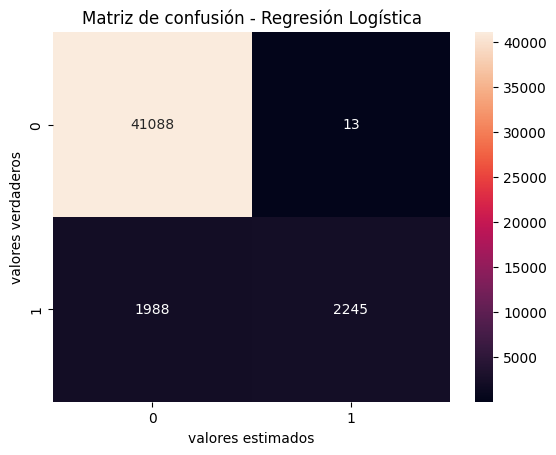

In [ ]:
## Modelo Supervisado
cm = confusion_matrix(y_test, logreg.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('valores estimados')
plt.ylabel('valores verdaderos')
plt.title('Matriz de confusión - Regresión Logística')

Text(0.5, 1.0, 'Matriz de confusión - Isolation Forest')

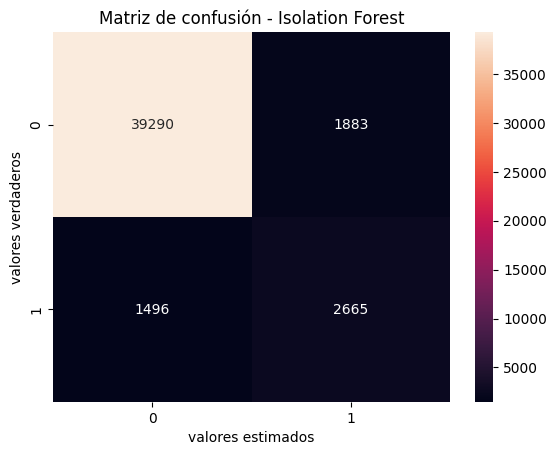

In [ ]:
## Modelo no Supervisado
cm = confusion_matrix(y_if_test, x_if_test[['resultado']])
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('valores estimados')
plt.ylabel('valores verdaderos')
plt.title('Matriz de confusión - Isolation Forest')

In [ ]:
## Modelo Supervisado
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41101
           1       0.99      0.53      0.69      4233

    accuracy                           0.96     45334
   macro avg       0.97      0.77      0.83     45334
weighted avg       0.96      0.96      0.95     45334



In [ ]:
## Modelos no supervisado
print(classification_report(y_if_test,x_if_test[['resultado']]))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     41173
           1       0.59      0.64      0.61      4161

    accuracy                           0.93     45334
   macro avg       0.77      0.80      0.79     45334
weighted avg       0.93      0.93      0.93     45334



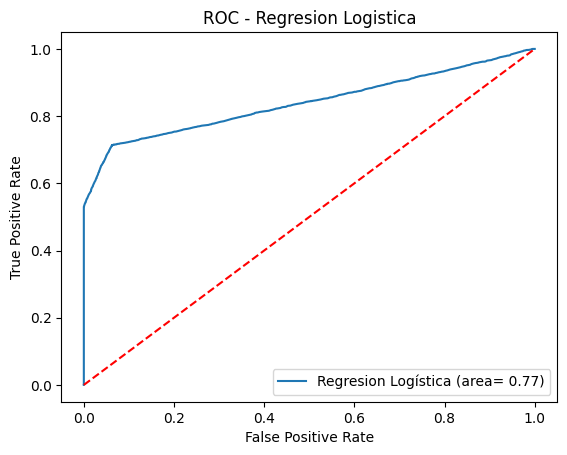

In [ ]:
## Modelo supervisado
logit_roc_auc = roc_auc_score(y_test,logreg.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Regresion Logística (area= %0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Regresion Logistica')
plt.legend(loc='lower right')
plt.show()

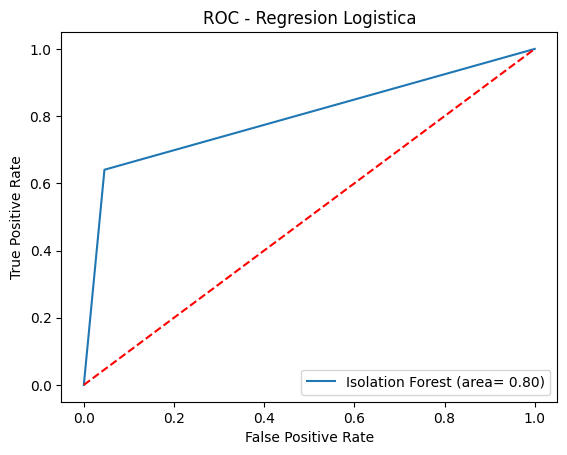

In [ ]:
## Modelo no supervisado
logit_roc_auc = roc_auc_score(y_if_test, x_if_test[['resultado']])
fpr,tpr,thresholds = roc_curve(y_if_test, x_if_test[['resultado']])
plt.figure()
plt.plot(fpr, tpr, label= 'Isolation Forest (area= %0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Regresion Logistica')
plt.legend(loc='lower right')
plt.show()